## Data analysis for interpolating missing data
In the Wrangling Data step there where datasets with 'missing columns'. In this notebook we'll be using interpolation/regression to fill these missing values.

- From 2015 to 2017 there are no entries for 'Social Support', it will be interpolated.
- From 2018 to 2019 there are no entries for 'Dystopia Residual', it will be interpolated. (It has a formula but can't find a proper definition online)
- Nan values



In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Set plots theme
palette = sns.color_palette(palette="blend:#87b7e0,#cf604a")
sns.set_theme(style="ticks", palette=palette, color_codes=True)

In [2]:
df = pd.read_csv('../data/processed/WorldHappinees2015_2022')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1230 non-null   int64  
 1   Country                    1230 non-null   object 
 2   Happiness Rank             1230 non-null   int64  
 3   Happiness Score            1230 non-null   float64
 4   Freedom                    1230 non-null   float64
 5   Generosity                 1230 non-null   float64
 6   Healthy life expectancy    1230 non-null   float64
 7   Perceptions of corruption  1229 non-null   float64
 8   GDP per capita             1230 non-null   float64
 9   Social support             760 non-null    float64
 10  Dystopia Residual          918 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 105.8+ KB


Check for nan values

In [4]:
## Missing Values %
round((df.isna().sum() / len(df))*100,2)

Year                          0.00
Country                       0.00
Happiness Rank                0.00
Happiness Score               0.00
Freedom                       0.00
Generosity                    0.00
Healthy life expectancy       0.00
Perceptions of corruption     0.08
GDP per capita                0.00
Social support               38.21
Dystopia Residual            25.37
dtype: float64

In [5]:
## Missing Values Count
df.isna().sum()

Year                           0
Country                        0
Happiness Rank                 0
Happiness Score                0
Freedom                        0
Generosity                     0
Healthy life expectancy        0
Perceptions of corruption      1
GDP per capita                 0
Social support               470
Dystopia Residual            312
dtype: int64

In [6]:
# First fix one record in perception of corruption
df[df['Perceptions of corruption'].isna()]

,Year,Country,Happiness Rank,Happiness Score,Freedom,Generosity,Healthy life expectancy,Perceptions of corruption,GDP per capita,Social support,Dystopia Residual
489,2018,United Arab Emirates,20,6.774,0.284,0.186,0.67,NaN,2.096,0.776,NaN


As we do not count with an exact formula that could calculate this value given the rest of the features, we need to imputate this value with some approximation. 

- Every record is highly important as it represents the performance of a country in one year, so dropping the column is not an option. 

- There are several ways of handling missing data, some really simple like calculating the mean of 'Perception of corruption' values, but not from the entire column (it wouldnt be accurate) but filtering the records from the country and then take the mean. 

- More advanced imputation techniques involve interpolation, which secure highly accuracy but being not so many records forthecountry a simple mean will do. 

In [7]:
# Filter United Arab emirates records
emirates_df = df[df.Country=='United Arab Emirates']
emirates_df

,Year,Country,Happiness Rank,Happiness Score,Freedom,Generosity,Healthy life expectancy,Perceptions of corruption,GDP per capita,Social support,Dystopia Residual
19,2015,United Arab Emirates,20,6.9010,0.641570,0.264280,0.809250,0.385830,1.427270,NaN,2.247430
185,2016,United Arab Emirates,28,6.5730,0.562150,0.265910,0.729930,0.355610,1.573520,NaN,2.215070
335,2017,United Arab Emirates,21,6.6480,0.608345,0.360942,0.726798,0.324490,1.626343,NaN,1.734704
489,2018,United Arab Emirates,20,6.7740,0.284000,0.186000,0.670000,NaN,2.096000,0.776000,NaN
646,2019,United Arab Emirates,21,6.8250,0.598000,0.262000,0.825000,0.182000,1.503000,1.310000,NaN
802,2020,United Arab Emirates,21,6.7908,0.652936,0.280656,0.787814,0.220214,1.431086,1.251171,2.166966
959,2021,United Arab Emirates,25,6.5610,0.670000,0.236000,0.594000,0.223000,1.555000,0.860000,2.422000
1107,2022,United Arab Emirates,24,6.5760,0.702000,0.204000,0.633000,0.250000,1.998000,0.980000,1.809000


0.2773061545290767

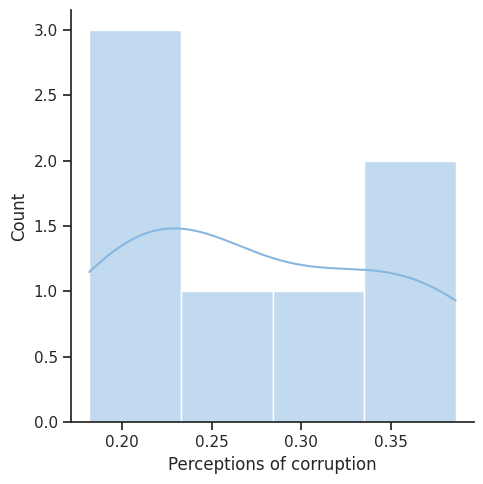

In [8]:
# Impute via mean
# Mean Imputation is a great choice, if distribution is normal or close to normal.
# In case of skewed distribution we shoud go with meadian value.

sns.displot(emirates_df, x="Perceptions of corruption", kde=True)
emirates_df["Perceptions of corruption"].mean()

In [9]:
# We can also observe that there is low variance, meaning they are around the mean value, so this is a good imputation.
df[df['Perceptions of corruption'].isna()] = emirates_df["Perceptions of corruption"].mean()

### Fix Missing Data with Interpolation
- Dystopia Residual: 25% of the data is missing, 312 rows
- Social support: 38% of the datais missing, 470 rows

In [14]:
# Apply label encoding for column Country with .cat.codes
df_le = df.copy()
df_le['Country'] = df_le['Country'].astype('category').cat.codes
df_le

,Year,Country,Happiness Rank,Happiness Score,Freedom,Generosity,Healthy life expectancy,Perceptions of corruption,GDP per capita,Social support,Dystopia Residual
0,2015.0,146,1.0,7.587,0.66557,0.29678,0.94143,0.41978,1.39651,NaN,2.51738
1,2015.0,63,2.0,7.561,0.62877,0.43630,0.94784,0.14145,1.30232,NaN,2.70201
2,2015.0,40,3.0,7.527,0.64938,0.34139,0.87464,0.48357,1.32548,NaN,2.49204
3,2015.0,113,4.0,7.522,0.66973,0.34699,0.88521,0.36503,1.45900,NaN,2.46531
4,2015.0,26,5.0,7.427,0.63297,0.45811,0.90563,0.32957,1.32629,NaN,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
1225,2022.0,19,142.0,3.471,0.57100,0.01200,0.28000,0.10200,1.50300,0.815,0.18700
1226,2022.0,127,143.0,3.268,0.62100,0.18700,0.46200,0.54400,0.78500,0.133,0.53600
1227,2022.0,170,144.0,2.995,0.32900,0.10600,0.27000,0.10500,0.94700,0.690,0.54800
1228,2022.0,82,145.0,2.955,0.10300,0.08200,0.63100,0.03400,1.39200,0.498,0.21600


#### KNN

In [21]:
### Defining KNN imputer
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)

df_KNNimputer = pd.DataFrame(knn.fit_transform(df_le)[:, [9,10]], columns=['Social support', 'Dystopia Residual'])
# df_KNNimputer = df_KNNimputer[['Social support', 'Dystopia Residual']]
df_KNNimputer

,Social support,Dystopia Residual
0,1.370481,2.51738
1,1.461513,2.70201
2,1.403490,2.49204
3,1.401235,2.46531
4,1.340878,2.45176
...,...,...
1225,0.815000,0.18700
1226,0.133000,0.53600
1227,0.690000,0.54800
1228,0.498000,0.21600


In [12]:
# Check missing values again 
df_KNNimputer.isna().sum()

Year                         0
Country                      0
Happiness Rank               0
Happiness Score              0
Freedom                      0
Generosity                   0
Healthy life expectancy      0
Perceptions of corruption    0
GDP per capita               0
Social support               0
Dystopia Residual            0
dtype: int64

#### Linear Regression

In [23]:
# Defining Linear Regressor
from sklearn.linear_model import LinearRegression
model_ss = LinearRegression()

# Cross validate
train_data = df_le[df_le[['Social support', 'Dystopia Residual']].notna()]
test_data = df_le[df_le['Social support', 'Dystopia Residual'].isna()]

X_train= train_data.drop(['Social support', 'Dystopia Residual'],axis=1)
y_train = train_data[['Social support', 'Dystopia Residual']]

X_test = test_data.drop(['Social support', 'Dystopia Residual'],axis=1)
y_test = test_data[['Social support', 'Dystopia Residual']]

model_ss.fit(X_train, y_train)

y_pred = model_ss.predict(X_test)
y_pred

KeyError: ('Social support', 'Dystopia Residual')

## Metrics

Cross Validation (K-fold)